## Observations and Insights 

- Ramicane seemed as effective as Capomulin

- Across all four treatment regimens, Infubinol had the only outlier

In [19]:
%matplotlib notebook

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [21]:
# Checking the number of mice.
mice_total = len(merged_df["Mouse ID"].unique())
mice_total


249

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_id = merged_df.loc[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_df.loc[merged_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = merged_df.loc[merged_df['Mouse ID'] != 'g989']
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_total = len(cleaned_df["Mouse ID"].unique())
mice_total


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.DataFrame({'mean':grp.mean(),'median':grp.median(),'var':grp.var(),'std':grp.std(),'sem':grp.sem()})

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

#statistics_summary = cleaned_df.groupby("Drug Regimen").agg(mean=("Tumor Volume (mm3)", np.mean), median=("Tumor Volume (mm3)", np.median), variance=("Tumor Volume (mm3)", np.var), std_deviation=("Tumor Volume (mm3)", np.std), sem=("Tumor Volume (mm3)", st.sem))
#statistics_summary.head()

statistics_summary = grp.agg(['mean', 'median', 'var', 'std', 'sem'])
statistics_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

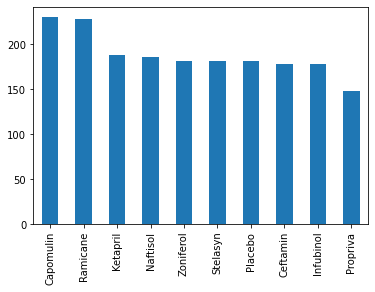

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment = cleaned_df["Drug Regimen"].value_counts()

treatment.plot(kind="bar")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

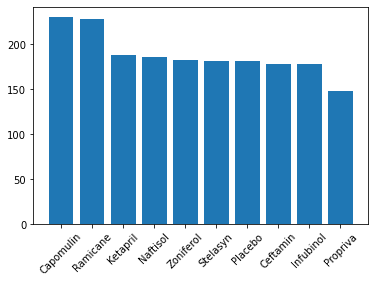

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment

plt.bar(treatment.index, treatment)
plt.xticks(rotation=45)

<IPython.core.display.Javascript object>


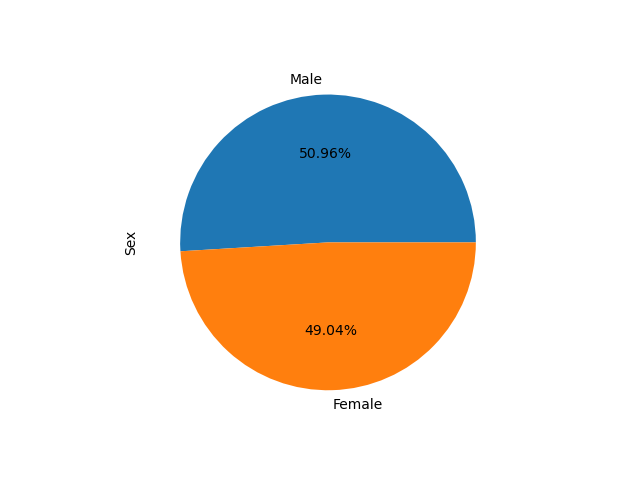

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
m_vs_f= cleaned_df["Sex"].value_counts()

m_vs_f.plot(kind="pie", autopct="%1.2f%%")



([<matplotlib.patches.Wedge at 0x1e1f7023c70>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '50.96%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.04%')])

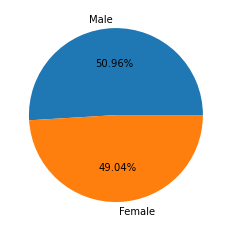

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
m_vs_f= cleaned_df["Sex"].value_counts()

plt.pie(m_vs_f,autopct='%1.2f%%',labels=m_vs_f.index)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint = cleaned_df.merge(max_timepoint, on=['Mouse ID','Timepoint'])
max_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = max_timepoint.loc[max_timepoint['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(final_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor<lower_bound) | (final_tumor<upper_bound)]
    print(f"{drug}\'s potential outliers {outliers}")

Capomulin's potential outliers 0      38.982878
224    38.753265
225    32.377357
226    23.343598
227    38.939633
228    28.484033
229    41.483008
230    40.728578
231    46.539206
232    31.023923
233    38.125164
234    40.658124
235    36.041047
236    37.311846
237    41.581521
238    31.896238
239    40.159220
240    37.074024
241    38.846876
242    39.952347
243    34.455298
244    47.685963
245    33.329098
246    30.485985
247    28.430964
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers 58     38.342008
59     36.561652
60     31.560470
61     38.407618
62     43.047543
63     37.311236
64     36.134852
65     44.183451
66     22.050126
67     33.397653
69     37.225650
70     32.978522
71     33.562402
72     29.128472
73     38.810366
74     40.667713
75     30.564625
76     43.166373
77     31.095335
78     30.276232
79     40.659006
80     30.638696
81     43.419381
110    45.220869
222    36.374510
Name: Tumor Volume (mm3), dtype: float64
Infubin

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1f707c730>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1f707cdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1f707c490>,
 'medians': [<matplotlib.lines.Line2D at 0x1e1f708d4f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e1f708d7f0>,
 'means': []}

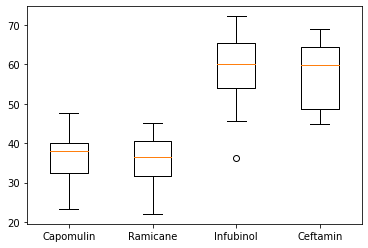

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels = drugs)

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


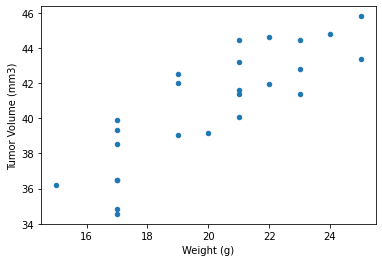

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_regimen = capomulin.groupby(["Mouse ID"]).agg({"Weight (g)":['mean'], "Tumor Volume (mm3)":['mean']})
mouse_regimen

mouse_regimen.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
